In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk.corpus
import markovify

### Useful Resources

1. https://pudding.cool/2017/08/the-office/
2. https://simpletexting.com/the-office-dialogue-analysis/
3. https://www.jennadallen.com/post/text-analytics-every-line-from-the-office/

In [2]:
df = pd.read_csv("The_Office_lines.csv", index_col='id')
df.drop(['scene'], axis = 1, inplace=True)
df.rename({'line_text': 'line'}, axis=1, inplace=True)
df.head()

season  episode                                               line  \
id                                                                       
1        1        1  All right Jim. Your quarterlies look very good...   
2        1        1         Oh, I told you. I couldn't close it. So...   
3        1        1  So you've come to the master for guidance? Is ...   
4        1        1         Actually, you called me in here, but yeah.   
5        1        1    All right. Well, let me show you how it's done.   

    speaker  deleted  
id                    
1   Michael    False  
2       Jim    False  
3   Michael    False  
4       Jim    False  
5   Michael    False

In [41]:
pd.set_option("display.max_rows", None)
lines_spoken = df.speaker.value_counts()[:20].reset_index(name="Lines spoken throughout the show")
lines_spoken

Michael     12145
Dwight       7532
Jim          6814
Pam          5375
Andy         3969
Kevin        1709
Angela       1695
Oscar        1491
Erin         1469
Ryan         1379
Darryl       1281
Phyllis      1071
Kelly         956
Jan           949
Toby          936
Stanley       761
Meredith      645
Holly         609
Nellie        529
Creed         456
Name: speaker, dtype: int64

In [4]:
fig = px.bar(lines_spoken, title='Lines spoken by popular characters', 
            labels=dict(index = "Speaker", value = "Dialogues spoken", variable=""))
fig.show()

In [17]:
df.head()

season  episode                                               line  \
id                                                                       
1        1        1  All right Jim. Your quarterlies look very good...   
2        1        1         Oh, I told you. I couldn't close it. So...   
3        1        1  So you've come to the master for guidance? Is ...   
4        1        1         Actually, you called me in here, but yeah.   
5        1        1    All right. Well, let me show you how it's done.   

    speaker  deleted  
id                    
1   Michael    False  
2       Jim    False  
3   Michael    False  
4       Jim    False  
5   Michael    False

In [27]:
season_dict = {'Michael': {}, 
               'Dwight': {},
               'Jim': {},
               'Pam': {},
               'Andy': {},
               'Kevin': {},
               'Angela': {},
               'Oscar': {},
               'Erin': {},
               'Ryan': {},
               'Darryl': {},
               'Phyllis': {},
               'Kelly': {},
               'Jan': {},
               'Toby': {},
               'Stanley': {},
               'Meredith': {},
               'Holly': {},
               'Nellie': {},
               'Creed': {}}

for index, row in df.iterrows():
    if row.speaker in season_dict:
        if row.season in season_dict[row.speaker]:
            season_dict[row.speaker][row.season] += 1
        else:
            season_dict[row.speaker].update({row.season: 1})

In [34]:
season_dict

{'Michael': {1: 643,
  2: 2324,
  3: 1990,
  4: 1636,
  5: 2163,
  6: 1983,
  7: 1404,
  9: 2},
 'Dwight': {1: 326,
  2: 1114,
  3: 940,
  4: 547,
  5: 1075,
  6: 812,
  7: 703,
  8: 946,
  9: 1069},
 'Jim': {1: 285,
  2: 905,
  3: 783,
  4: 684,
  5: 875,
  6: 928,
  7: 687,
  8: 869,
  9: 798},
 'Pam': {1: 219,
  2: 729,
  3: 665,
  4: 528,
  5: 706,
  6: 706,
  7: 612,
  8: 475,
  9: 735},
 'Andy': {3: 391, 4: 223, 5: 497, 6: 538, 7: 557, 8: 1125, 9: 638},
 'Kevin': {1: 30,
  2: 157,
  3: 212,
  4: 141,
  5: 187,
  6: 228,
  7: 240,
  8: 247,
  9: 267},
 'Angela': {1: 32,
  2: 162,
  3: 243,
  4: 193,
  5: 221,
  6: 136,
  7: 161,
  8: 166,
  9: 381},
 'Oscar': {1: 58,
  2: 130,
  3: 72,
  4: 111,
  5: 216,
  6: 177,
  7: 197,
  8: 235,
  9: 295},
 'Erin': {5: 53, 6: 298, 7: 311, 8: 427, 9: 380},
 'Ryan': {1: 52,
  2: 227,
  3: 197,
  4: 228,
  5: 169,
  6: 125,
  7: 176,
  8: 189,
  9: 16},
 'Darryl': {1: 17,
  2: 76,
  3: 89,
  4: 59,
  5: 102,
  6: 100,
  7: 248,
  8: 312,
  9: 2

In [35]:
plot_df = pd.DataFrame.from_dict(season_dict)
plot_df = plot_df.reindex([i for i in range(1, 10)])
plot_df

Michael  Dwight  Jim  Pam    Andy  Kevin  Angela  Oscar   Erin  Ryan  \
1    643.0     326  285  219     NaN     30      32     58    NaN    52   
2   2324.0    1114  905  729     NaN    157     162    130    NaN   227   
3   1990.0     940  783  665   391.0    212     243     72    NaN   197   
4   1636.0     547  684  528   223.0    141     193    111    NaN   228   
5   2163.0    1075  875  706   497.0    187     221    216   53.0   169   
6   1983.0     812  928  706   538.0    228     136    177  298.0   125   
7   1404.0     703  687  612   557.0    240     161    197  311.0   176   
8      NaN     946  869  475  1125.0    247     166    235  427.0   189   
9      2.0    1069  798  735   638.0    267     381    295  380.0    16   

   Darryl  Phyllis  Kelly    Jan  Toby  Stanley  Meredith  Holly  Nellie  \
1      17       11      4   38.0    23       27        18    NaN     NaN   
2      76      134    115  285.0   148      108        41    NaN     NaN   
3      89      112    176  298.0   122       94        60    NaN     NaN   
4      59       99     95  214.0   144       81        62   74.0     NaN   
5     102      180    156   64.0    71      113       115  270.0     NaN   
6     100      138    120    NaN   100       72        82    NaN     NaN   
7     248      147    153   17.0    97       75        70  265.0     9.0   
8     312      123    123    NaN   106       91        83    NaN   233.0   
9     278      127     14   33.0   125      100       114    NaN   287.0   

   Creed  
1    NaN  
2   77.0  
3   71.0  
4   67.0  
5   52.0  
6   38.0  
7   66.0  
8   33.0  
9   52.0

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=5, cols=4, subplot_titles=('Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 
                                                    'Oscar', 'Erin', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Jan', 
                                                    'Toby', 'Stanley', 'Meredith', 'Holly', 'Nellie', 'Creed'))

fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Michael),
    row=1, col=1,
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Dwight),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Jim),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Pam),
    row=1, col=4
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Andy),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Kevin),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Angela),
    row=2, col=3
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Oscar),
    row=2, col=4
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Erin),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Ryan),
    row=3, col=2
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Darryl),
    row=3, col=3
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Phyllis),
    row=3, col=4
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Kelly),
    row=4, col=1
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Jan),
    row=4, col=2
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Toby),
    row=4, col=3
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Stanley),
    row=4, col=4
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Meredith),
    row=5, col=1
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Holly),
    row=5, col=2
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Nellie),
    row=5, col=3
)
fig.add_trace(
    go.Scatter(x=plot_df.index, y=plot_df.Creed),
    row=5, col=4
)
fig.update_layout(height=800, width=1000, title_text="Dialogues by season")
fig.show()

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [6]:
with open('most_common_english_words.txt', 'r') as file:
    most_common = [i.strip('\n') for i in file.readlines()]

In [7]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [8]:
def speaker_wordcloud(speaker):
    speaker_lines = df.loc[df['speaker'] == speaker, 'line']
    speaker_words = []
    for line in speaker_lines:
        words = tokenizer.tokenize(line)
        speaker_words.extend(words)

    speaker_words = [word.lower() for word in speaker_words]
    speaker_words = list(filter(lambda x: x not in most_common, speaker_words))
    speaker_words = list(filter(lambda x: x not in stopwords, speaker_words))
    speaker_words = list(filter(lambda x: len(x) > 2, speaker_words))
    
    #convert it to dictionary with values and its occurences
    word_could_dict = Counter(speaker_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

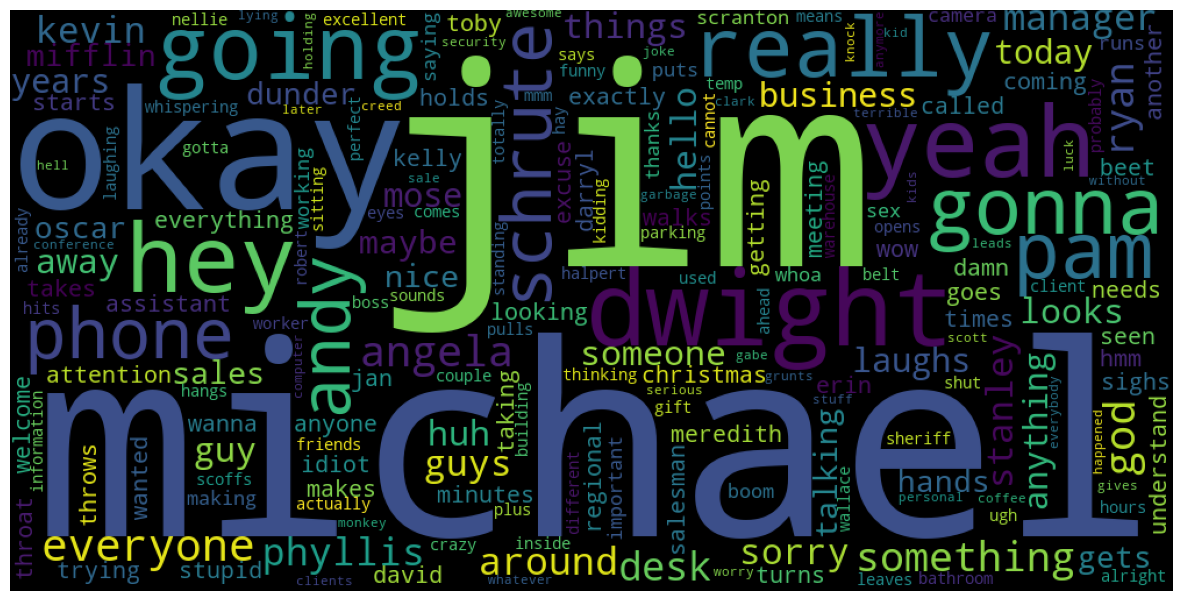

In [9]:
speaker_wordcloud('Dwight')

In [10]:
df.tail()

season  episode                                               line  \
id                                                                          
59905       9       23  It all seems so very arbitrary. I applied for ...   
59906       9       23  I just feel lucky that I got a chance to share...   
59907       9       23  I'm happy that this was all filmed so I can re...   
59908       9       23  I sold paper at this company for 12 years. My ...   
59909       9       23  I thought it was weird when you picked us to m...   

        speaker  deleted  
id                        
59905     Creed    False  
59906  Meredith    False  
59907   Phyllis    False  
59908       Jim    False  
59909       Pam    False

In [11]:
speaker_lines = df.loc[df['speaker'] == "Angela", 'line']
print(speaker_lines)

id
68           I bet it's gonna be me. Probably gonna be me.
246      My name is Angela and um, I'm in charge of the...
248      Oscar, how do I describe him. He's like a stap...
251      Not very worried about downsizing right now. B...
253      I have a lot of cat figurines on my desk. I th...
446                                                   Hey.
448                                                  Sure.
450                                                    No.
452                                                Stop...
657                           Kevin! That's inappropriate.
673                  It's ridiculous. Did you talk to him?
675      You let him walk all over you. It's just pathe...
677                                        Nothing, Kevin.
804                               What about the surprise?
921                                                  What?
923                  No, yeah, I think that's a good idea.
925                          What color do you guys t

In [12]:
# def speaker_lines(speaker):
#     speaker_lines = df.loc[df['speaker'] == speaker, 'line']
#     with open(f"./character_lines/{speaker}_lines.txt", "w", encoding="utf-8") as file:
#         for line in speaker_lines:
#             file.writelines(line + '\n')

In [42]:
speakers = lines_spoken.index.tolist()
print(speakers)

['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Oscar', 'Erin', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Jan', 'Toby', 'Stanley', 'Meredith', 'Holly', 'Nellie', 'Creed']


In [14]:
# for i in speakers:
#     speaker_lines(i)

In [15]:
def dialogue_generator(speaker, n):
    # Get raw text as string.
    with open(f"./character_lines/{speaker}_lines.txt", "r") as f:
        text = f.read()

    # Build the model.
    markov_model = markovify.NewlineText(text)
    
    for i in range(n):
        print(markov_model.make_short_sentence(110))

In [16]:
dialogue_generator("Michael", 5)

Well, there was wind. I want to pursue a lose/lose negotiation?
I got this for you, but I heard you talking about--
... Oh, God is that we're nothing special because I know this is like. This is me!
You love it. I dare you.
You know Drew, why don't you go first. When I said what I am backed into a non-stick...
